In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids


In [4]:
from sklearn import datasets
myiris = datasets.load_iris()
x = myiris.data
y = myiris.target

In [5]:
x.shape

(150, 4)

In [6]:
y.shape


(150,)

In [7]:
#bringing all features to a comparable scale 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
kMedoids = KMedoids(n_clusters = 3,random_state=0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)

In [8]:
#silhouette coeff = s(i) = (b(i) - a(i))/(max(a(i),b(i)))
from sklearn.metrics import silhouette_samples, silhouette_score
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)
silhouette_avg = silhouette_score(x_scaled,y_kmed)
print(silhouette_avg)

0.4590416105554613


In [10]:
#silhouette score for each clusters
sample_silhouette_values = silhouette_samples(x_scaled,y_kmed)
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
    print(np.mean(ith_cluster_silhouette_values))

0.636330614585637
0.3768888598233938
0.36213487963471125


In [15]:
sw = []

for i in range(2,11):
    kMedoids = KMedoids(n_clusters = i, random_state = 0)
    kMedoids.fit(x_scaled)
    y_kmed = kMedoids.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled,y_kmed)
    sw.append(silhouette_avg)

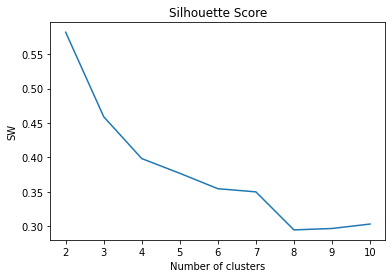

In [16]:
#silhouette width is populated for different values of clusters
plt.plot(range(2,11),sw)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW') #within cluster sum of squares
plt.show()

In [18]:
#elbow at no of clusters = 3

In [25]:
from sklearn import metrics

def purity_score(y_true,y_pred):
    # compute contigency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true,y_pred)
    #return purity
    return np.sum(np.amax(contingency_matrix,axis = 0)) / np.sum(contingency_matrix)
    

In [20]:
#how extreme values affect kmedoids in comparison to kmeans


In [26]:
kmeans = KMeans(n_clusters=3, init='random',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(x_scaled)
purity_score(y,y_kmeans)

0.8333333333333334

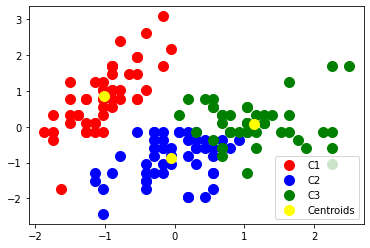

In [29]:
plt.scatter(x_scaled[y_kmeans == 0,0],x_scaled[y_kmeans == 0,1] , s=100 , c='red',label='C1')
plt.scatter(x_scaled[y_kmeans == 1,0],x_scaled[y_kmeans == 1,1] , s=100 , c='blue',label='C2')
plt.scatter(x_scaled[y_kmeans == 2,0],x_scaled[y_kmeans == 2,1] , s=100 , c='green',label='C3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()


In [30]:
kMedoids = KMedoids(n_clusters=3, random_state=0).fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)
purity_score(y,y_kmed)

0.84

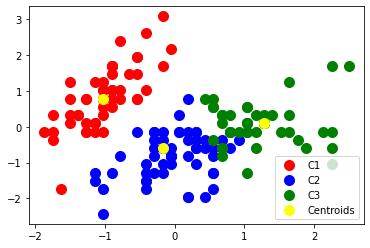

In [31]:
plt.scatter(x_scaled[y_kmed == 0,0],x_scaled[y_kmed == 0,1] , s=100 , c='red',label='C1')
plt.scatter(x_scaled[y_kmed == 1,0],x_scaled[y_kmed == 1,1] , s=100 , c='blue',label='C2')
plt.scatter(x_scaled[y_kmed == 2,0],x_scaled[y_kmed == 2,1] , s=100 , c='green',label='C3')
plt.scatter(kMedoids.cluster_centers_[:,0],kMedoids.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()

## Adding extreme values


In [32]:
import numpy as np
m = np.append(x,[[10,10,10,10],[15,15,15,15],[12,12,12,12]],axis=0)
m.shape
#making no of rows same in m and y
y = np.append(y,[2,2,2])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
m.shape

(153, 4)

In [35]:
y.shape

(153,)

In [36]:
scaler = StandardScaler().fit(m)
x_scaled = scaler.transform(m)

In [37]:
kmeans = KMeans(n_clusters=3, init='random',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(x_scaled)
purity_score(y,y_kmeans)

0.673202614379085

In [38]:
kMedoids = KMedoids(n_clusters=3, random_state=0).fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)
purity_score(y,y_kmed)

0.8627450980392157

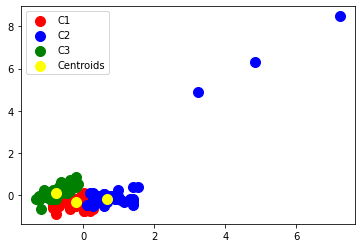

In [39]:
plt.scatter(x_scaled[y_kmed == 0,0],x_scaled[y_kmed == 0,1] , s=100 , c='red',label='C1')
plt.scatter(x_scaled[y_kmed == 1,0],x_scaled[y_kmed == 1,1] , s=100 , c='blue',label='C2')
plt.scatter(x_scaled[y_kmed == 2,0],x_scaled[y_kmed == 2,1] , s=100 , c='green',label='C3')
plt.scatter(kMedoids.cluster_centers_[:,0],kMedoids.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()

In [40]:
#centroid is not distorted

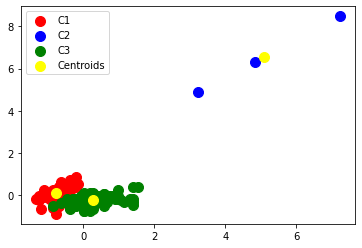

In [41]:
plt.scatter(x_scaled[y_kmeans == 0,0],x_scaled[y_kmeans == 0,1] , s=100 , c='red',label='C1')
plt.scatter(x_scaled[y_kmeans == 1,0],x_scaled[y_kmeans == 1,1] , s=100 , c='blue',label='C2')
plt.scatter(x_scaled[y_kmeans == 2,0],x_scaled[y_kmeans == 2,1] , s=100 , c='green',label='C3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()

## Outliers affect cluster distribution very highly  in kmeans but bery less in kmedoids

In [42]:
data = [['k-Means',0.83],['k-Means with outliers',0.67],['k-Medoid',0.84],['k-Medoid with outliers',0.86]]
df = pd.DataFrame(data,columns=['Method','Purity'])

<AxesSubplot:title={'center':'Cluster quality'}, xlabel='Method'>

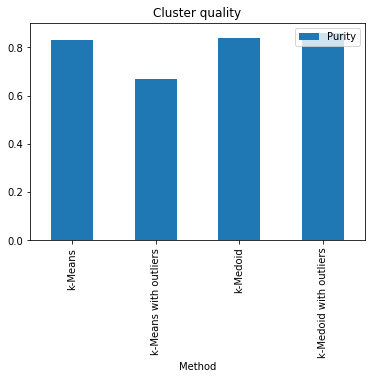

In [43]:
df.plot.bar(x='Method',y='Purity',title='Cluster quality')